In [1]:
import glob
from itertools import chain

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

In [2]:
datapath = 'results/melody_rnn/logdir/basic/train/'
eventfiles = glob.glob(datapath+'events.out.tfevents.*')

In [3]:
loss = []
accuracy = []
perplexity = []

try:
    for this_file in eventfiles:    
        for e in tf.train.summary_iterator(this_file):
            for v in e.summary.value:
                if v.tag == 'loss':
                    loss = np.append(loss,v.simple_value)
                elif v.tag == 'metrics/accuracy':
                    accuracy = np.append(accuracy,v.simple_value)
                elif v.tag == 'metrics/perplexity':
                    perplexity = np.append(perplexity,v.simple_value)
except:
    pass

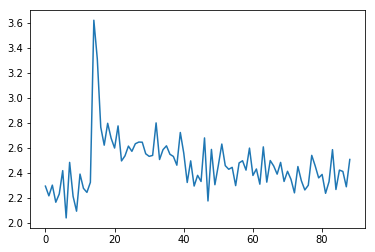

In [4]:
plt.plot(loss)

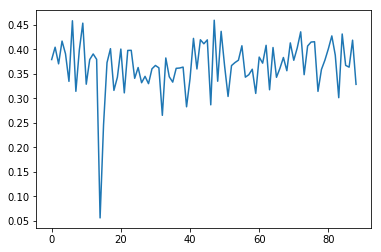

In [5]:
plt.plot(accuracy)

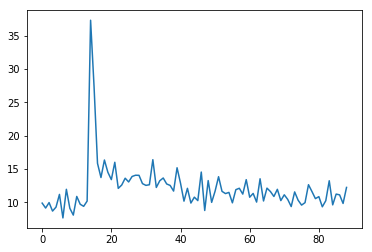

In [6]:
plt.plot(perplexity)

In [7]:
latest_checkpoint =  tf.train.latest_checkpoint(datapath)

tf.reset_default_graph()

sess=tf.Session() 
saver = tf.train.import_meta_graph(latest_checkpoint+'.meta')
saver.restore(sess,latest_checkpoint)

with sess.as_default():
    tf.train.start_queue_runners()
    outputs=sess.graph.get_collection('outputs')[0].eval()

INFO:tensorflow:Restoring parameters from /Users/nalinisingh/dev/9.520-NoteRNN-Regularization/results/melody_rnn/logdir/basic/train/model.ckpt-3533


In [8]:
print eventfiles

['results/melody_rnn/logdir/basic/train/events.out.tfevents.1512852685.Nalinis-MBP', 'results/melody_rnn/logdir/basic/train/events.out.tfevents.1512845973.Nalinis-MBP', 'results/melody_rnn/logdir/basic/train/events.out.tfevents.1512847387.Nalinis-MBP']
